In [ ]:
# Imports
%matplotlib inline
# OpenCV utiliza numpy para las imagenes
import numpy as np
import cv2 as cv
# matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

In [ ]:
# Montamos el drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cuando utilizas OpenCV para abrir una imagen, por defecto interpreta los canales de color en el orden BGR (azul, verde, rojo). Esto significa que si accedes a los valores de los píxeles, obtendrás una matriz donde el primer canal corresponde al canal azul, el segundo canal al canal verde y el tercer canal al canal rojo.

Tamaño imagen: (996, 908, 3)


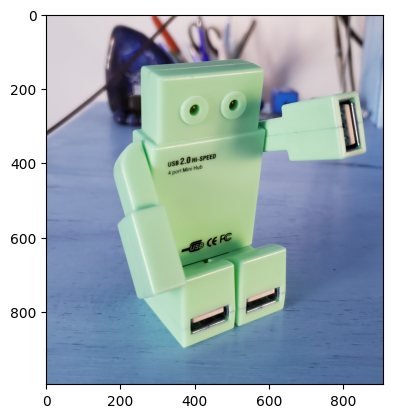

In [ ]:
# Abrimos la imagen a color, por defecto con openCV es en bgr.
imagen_bgr = cv.imread('CoordCrom_1.png')
# Dimensión de la imagen
print(f'Tamaño imagen: {imagen_bgr.shape}') # Salida: (alto[px], ancho[px], canales). 
plt.imshow(imagen_bgr)
plt.show()

La forma de la imagen devuelta será una tupla que contiene el alto, el ancho y el número de canales de la imagen.  En una imagen en color, los canales generalmente serán 3 (rojo, verde y azul).

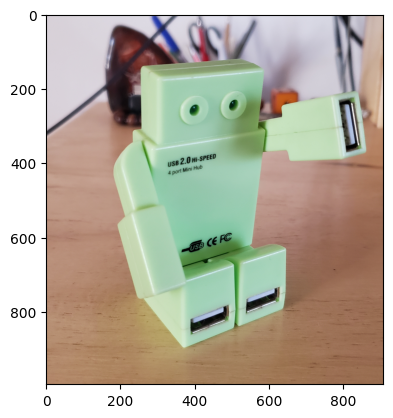

In [ ]:
# Podemos pasarla a RGB
imagen_rgb = cv.cvtColor(imagen_bgr, cv.COLOR_BGR2RGB)
plt.imshow(imagen_rgb)
plt.show()

imagen_salida = cv2.cvtColor(imagen_entrada, codigo_color)

* imagen_entrada: Es la imagen que deseas convertir de un espacio de color a otro.
* codigo_color: Especifica el tipo de conversión que deseas realizar. Puedes utilizar constantes de OpenCV para especificar el código de color correspondiente a la conversión deseada. Por ejemplo, cv2.COLOR_BGR2RGB para convertir de BGR a RGB, cv2.COLOR_BGR2GRAY para convertir de BGR a escala de grises.

# Parte 1

Implementamos algoritmo de pasaje de coordenadas cromaticas

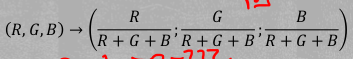

# COORDENADAS CROMATICAS

In [ ]:
# 1.

# Definición función para leer las imagenes y pasarlas a RGB
def imagen_read(imagen):
  imagen_bgr = cv.imread(imagen)
  imagen_rgb = cv.cvtColor(imagen_bgr, cv.COLOR_BGR2RGB)
  return imagen_rgb

# Definición funcion pasaje a coordenadas cromaticas
def to_cord_cromatica(imagen_rgb):
  img_r, img_g, img_b = cv.split(imagen_rgb) # Split sobre las clases de la imagen
  # denom_cord = (img_r + img_g + img_b).astype('uint16') + 0.001
  denom_cord = img_r.astype('uint16') + img_g.astype('uint16') + img_b.astype('uint16') + 0.001 # El 0.001 evita la posibilidad de tener una división por 0
  img_r_crom = np.divide(img_r, denom_cord)
  img_g_crom = np.divide(img_g, denom_cord)
  img_b_crom = np.divide(img_b, denom_cord)
  imagen_rgb_crom = cv.merge((img_r_crom,img_g_crom,img_b_crom))
  return imagen_rgb_crom

El tipo de dato uint16 representa enteros sin signo de 16 bits, lo que significa que solo puede almacenar valores enteros no negativos desde 0 hasta 65535. Al realizar operaciones aritméticas, como la suma en este caso, existe la posibilidad de que los valores resultantes excedan el rango máximo de 8 bits (0-255) comúnmente utilizado para representar imágenes en OpenCV.

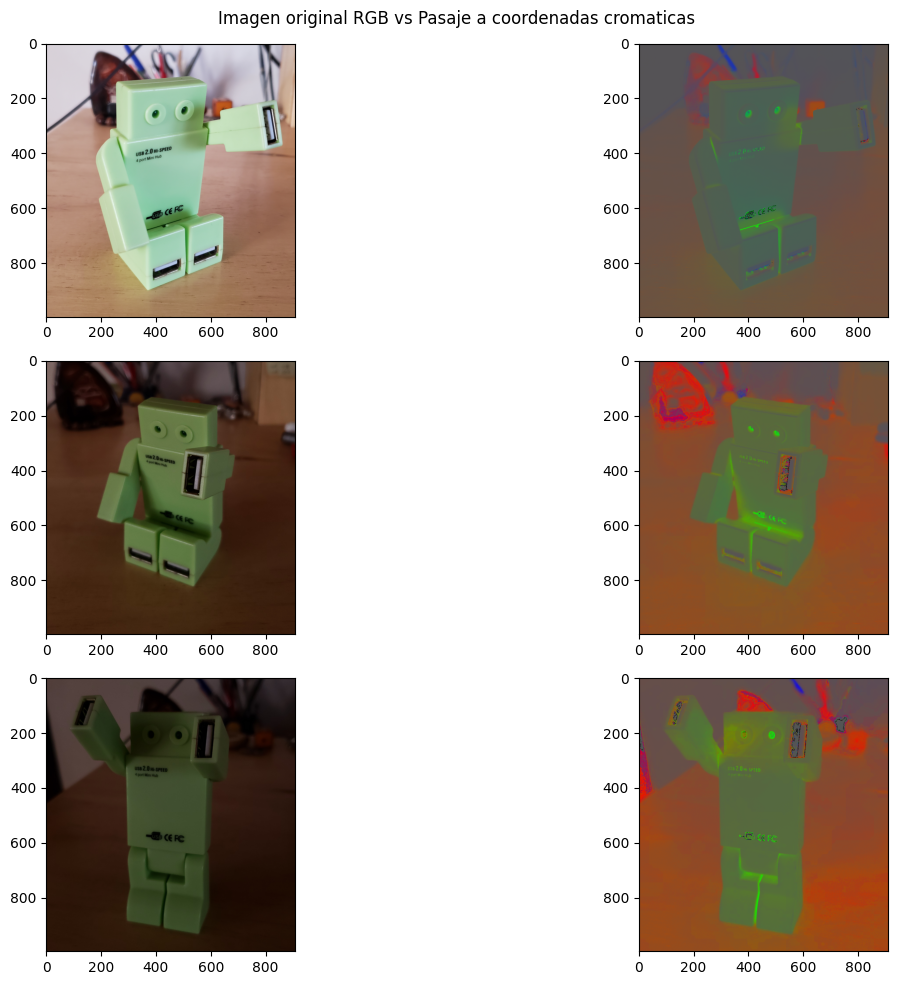

In [ ]:
imagen_rgb_1 = imagen_read('CoordCrom_1.png')
imagen_rgb_2 = imagen_read('CoordCrom_2.png')
imagen_rgb_3 = imagen_read('CoordCrom_3.png')
imagen_rgb_crom_1 = to_cord_cromatica(imagen_rgb_1)
imagen_rgb_crom_2 = to_cord_cromatica(imagen_rgb_2)
imagen_rgb_crom_3 = to_cord_cromatica(imagen_rgb_3)
fig, axs = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Imagen original RGB vs Pasaje a coordenadas cromaticas')
fig.tight_layout() 
axs[0,0].imshow(imagen_rgb_1)
axs[0,1].imshow(imagen_rgb_crom_1)
axs[1,0].imshow(imagen_rgb_2)
axs[1,1].imshow(imagen_rgb_crom_2)
axs[2,0].imshow(imagen_rgb_3)
axs[2,1].imshow(imagen_rgb_crom_3)

# WHITE-PATCH

El algoritmo de White-Patch (también conocido como algoritmo de equilibrio de blancos) es un método utilizado en procesamiento de imágenes para corregir y ajustar el balance de blancos en una imagen. El objetivo principal del algoritmo es eliminar cualquier dominante de color no deseada en la imagen, especialmente cuando la iluminación de la escena varía o no es neutral.

El algoritmo de White-Patch se basa en la suposición de que las superficies más iluminadas en una escena deben aparecer como blanco puro o neutro, sin ninguna dominante de color. Para corregir el balance de blancos, el algoritmo identifica un píxel de referencia o punto blanco en la imagen y ajusta todos los píxeles de la imagen para que ese punto de referencia se convierta en blanco puro.

Este proceso de ajuste de balance de blancos ayuda a mejorar la apariencia de las imágenes, eliminando dominantes de color no deseadas y obteniendo una representación más precisa de los colores reales de la escena. Sin embargo, tiene sus limitaciones y puede no funcionar de manera óptima en todas las condiciones de iluminación.

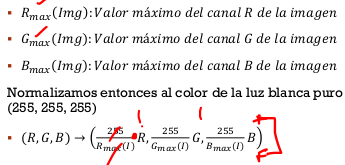

In [ ]:
# 2.

# Definición funcion white-patch
def white_patch (imagen_rgb, porc):
  img_r, img_g, img_b = cv.split(imagen_rgb) # Split sobre las clases de la imagen
  # Nos quedamos con el valor máximo dependiendo del porcentaje
  max_img_r = np.percentile(img_r, porc)
  max_img_g = np.percentile(img_g, porc)
  max_img_b = np.percentile(img_b, porc)
  # Calculamos cada clase
  img_r_wp = np.clip((255 / max_img_r) * img_r, 0, 255).astype('uint8')
  img_g_wp = np.clip((255 / max_img_g) * img_g, 0, 255).astype('uint8')
  img_b_wp = np.clip((255 / max_img_b) * img_b, 0, 255).astype('uint8')
  imagen_rgb_wp = cv.merge((img_r_wp,img_g_wp,img_b_wp))
  return imagen_rgb_wp

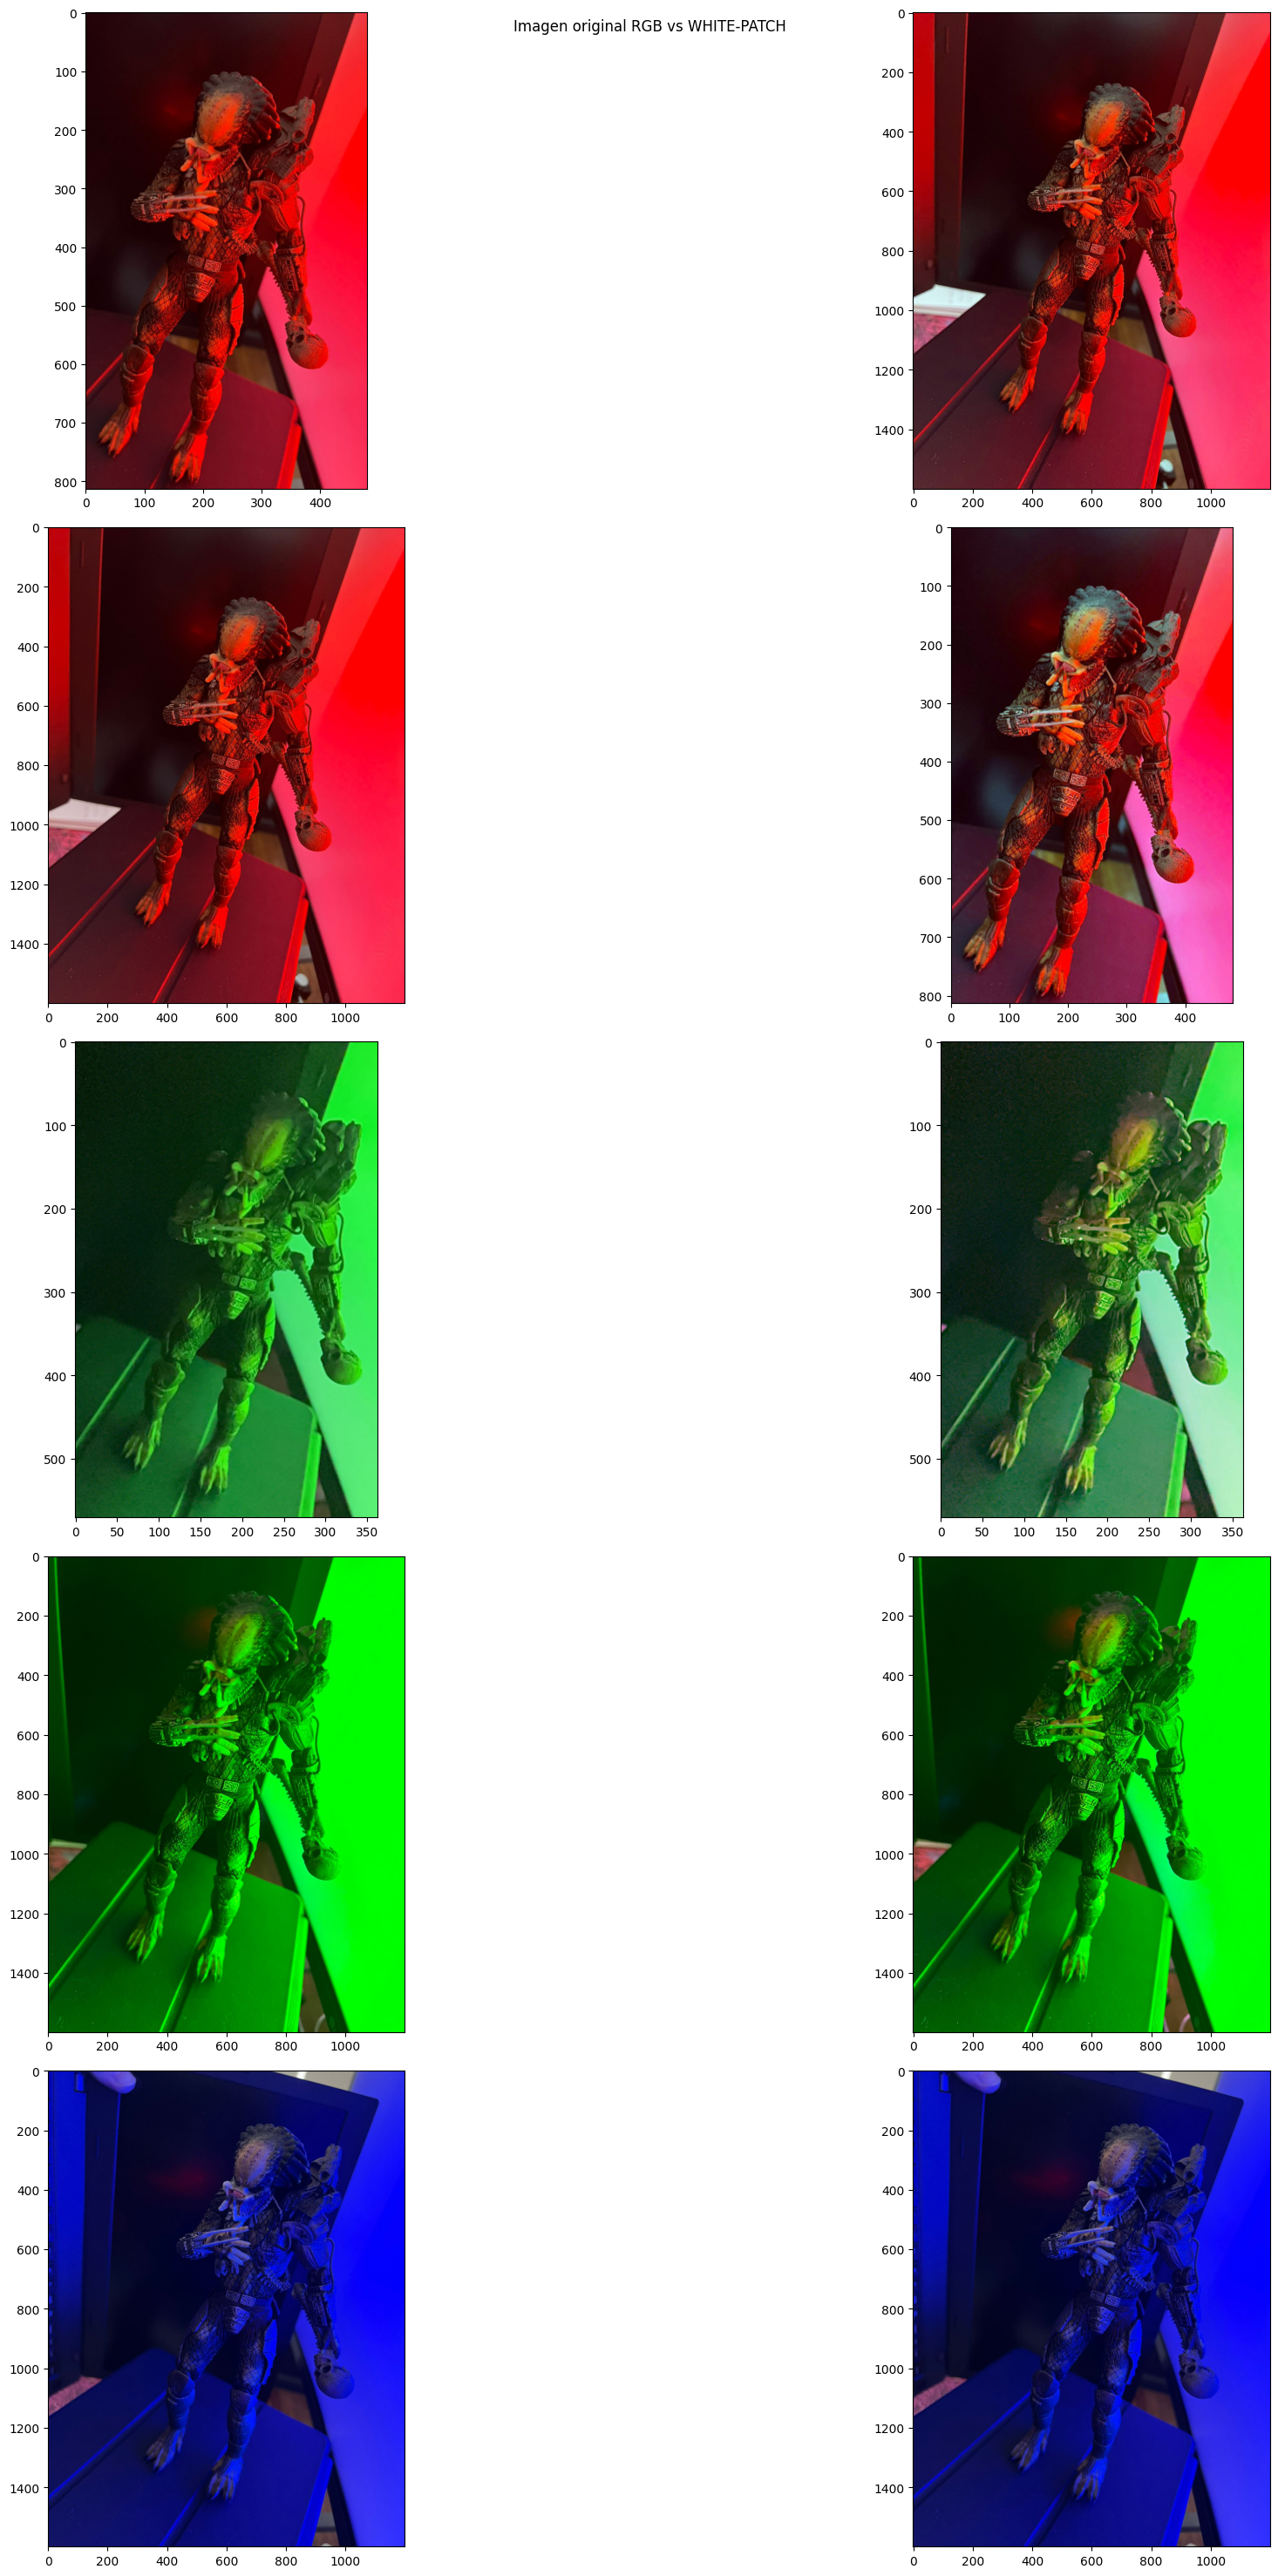

In [ ]:
imagen_rgb_1 = imagen_read('wp_red.png')
imagen_rgb_1_red2 = imagen_read('wp_red2.jpg')
imagen_rgb_2 = imagen_read('wp_green.png')
imagen_rgb_2_green2 = imagen_read('wp_green2.jpg')
imagen_rgb_3 = imagen_read('wp_blue.jpg')
imagen_rgb_wp_1 = white_patch(imagen_rgb_1_red2, 100)
imagen_rgb_wp_1_red2 = white_patch(imagen_rgb_1, 100)
imagen_rgb_wp_2 = white_patch(imagen_rgb_2, 100)
imagen_rgb_wp_2_green2 = white_patch(imagen_rgb_2_green2, 100)
imagen_rgb_wp_3 = white_patch(imagen_rgb_3, 100)
fig, axs = plt.subplots(5, 2, figsize=(20, 30))
fig.suptitle('Imagen original RGB vs WHITE-PATCH')
fig.tight_layout()
axs[0,0].imshow(imagen_rgb_1)
axs[0,1].imshow(imagen_rgb_wp_1)
axs[1,0].imshow(imagen_rgb_1_red2)
axs[1,1].imshow(imagen_rgb_wp_1_red2)
axs[2,0].imshow(imagen_rgb_2)
axs[2,1].imshow(imagen_rgb_wp_2)
axs[3,0].imshow(imagen_rgb_2_green2)
axs[3,1].imshow(imagen_rgb_wp_2_green2)
axs[4,0].imshow(imagen_rgb_3)
axs[4,1].imshow(imagen_rgb_wp_3)

Podemos decir que el white-patch no funciona correctamente cuando existe una saturacion de color.

Cuando un color específico está muy saturado en la imagen, significa que hay una gran cantidad de información en ese canal de color en particular. En consecuencia, cuando se aplica el método White-Patch, puede haber una sobrecompensación en ese canal, eso provoca una alteración en los colores en general y una pérdida de detalles en las áreas saturadas.

# PARTE 2

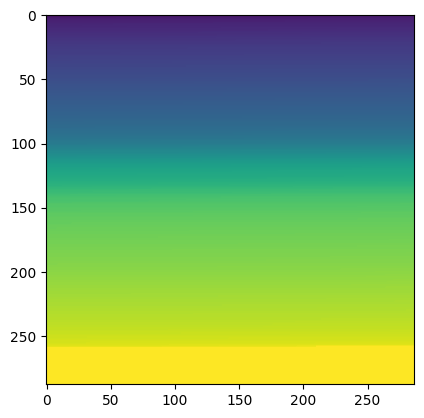

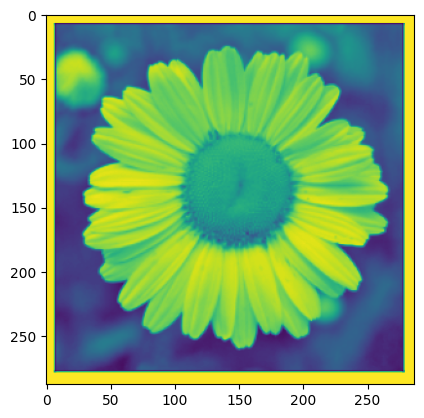

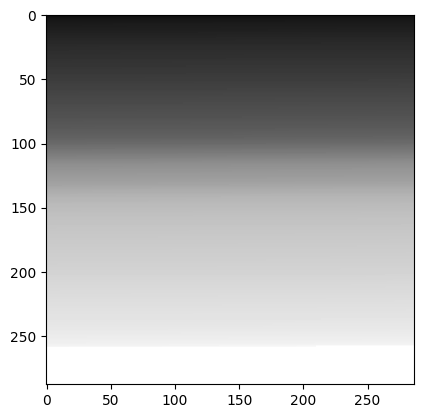

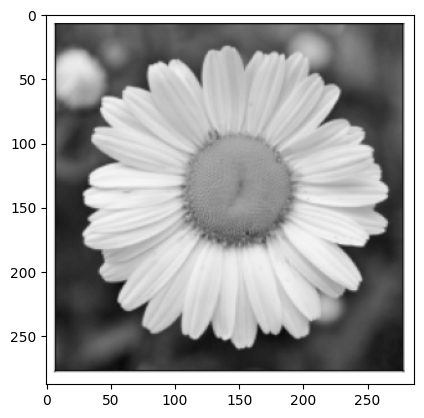

In [ ]:
# 1. Visualizamos en escala de grisces con openCV

img1_tp = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img2_tp = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img1_tp)
plt.show()

# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img2_tp)
plt.show()

# Muestro la imagen con matplotlib en gris
plt.figure()
plt.imshow(img1_tp, cmap='gray')
plt.show()

# Muestro la imagen con matplotlib gris
plt.figure()
plt.imshow(img2_tp, cmap='gray')
plt.show()

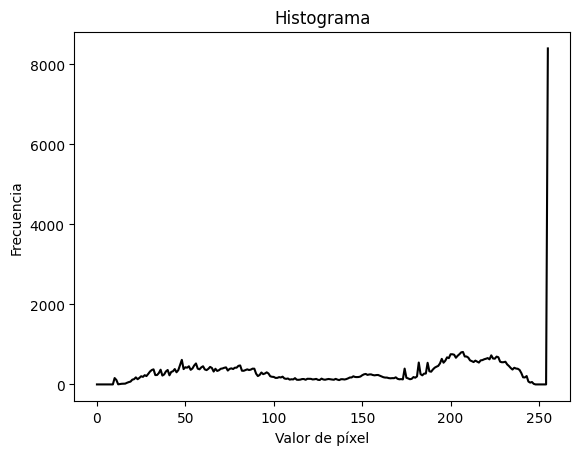

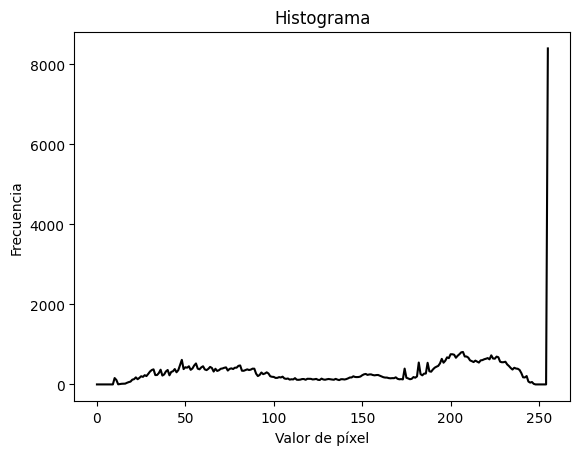

In [ ]:
# 2.

# Calcular el histograma
hist1 = cv.calcHist([img1_tp], [0], None, [256], [0, 256])
hist2 = cv.calcHist([img2_tp], [0], None, [256], [0, 256])

# Graficar el histograma 1
plt.plot(hist1, color='black')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

# Graficar el histograma 2
plt.plot(hist2, color='black')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

Cada bin del histograma representa un rango de valores de píxeles y la altura de cada bin indica la frecuencia de píxeles dentro de ese rango, podemos ver que los histogramas son identicos, por lo que no seria prudente utilizarlos como features para clasificación o detección de imagenes.

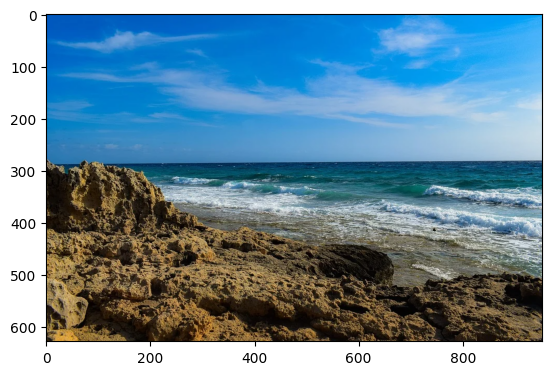

In [ ]:
# 3.
img = cv.imread('segmentacion.png')
imagen_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(imagen_rgb)
plt.show()

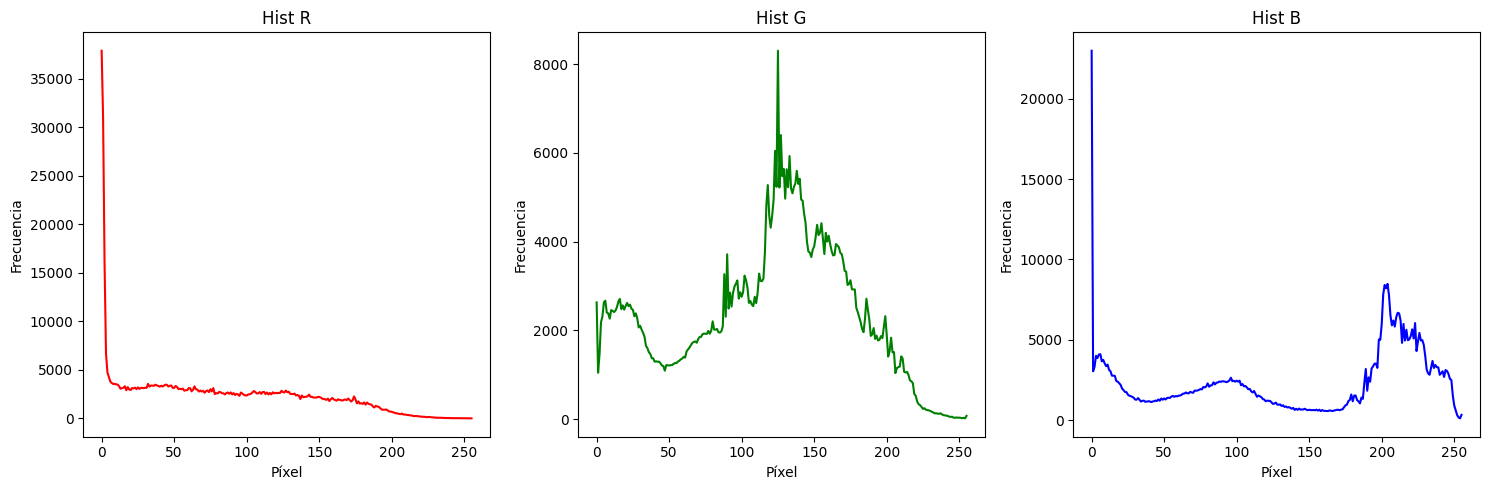

In [ ]:
# Histogramas de los canales RGB
img_r, img_g, img_b = cv.split(imagen_rgb) # Split sobre las clases de la imagen
hist_r = cv.calcHist([img_r], [0], None, [256], [0, 256])
hist_g = cv.calcHist([img_g], [0], None, [256], [0, 256])
hist_b = cv.calcHist([img_b], [0], None, [256], [0, 256])

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma R
axs[0].plot(hist_r, color='red')
axs[0].set_xlabel('Píxel')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Hist R')

# Histograma G
axs[1].plot(hist_g, color='green')
axs[1].set_xlabel('Píxel')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Hist G')

# Histograma B
axs[2].plot(hist_b, color='blue')
axs[2].set_xlabel('Píxel')
axs[2].set_ylabel('Frecuencia')
axs[2].set_title('Hist B')

plt.tight_layout()
plt.show()

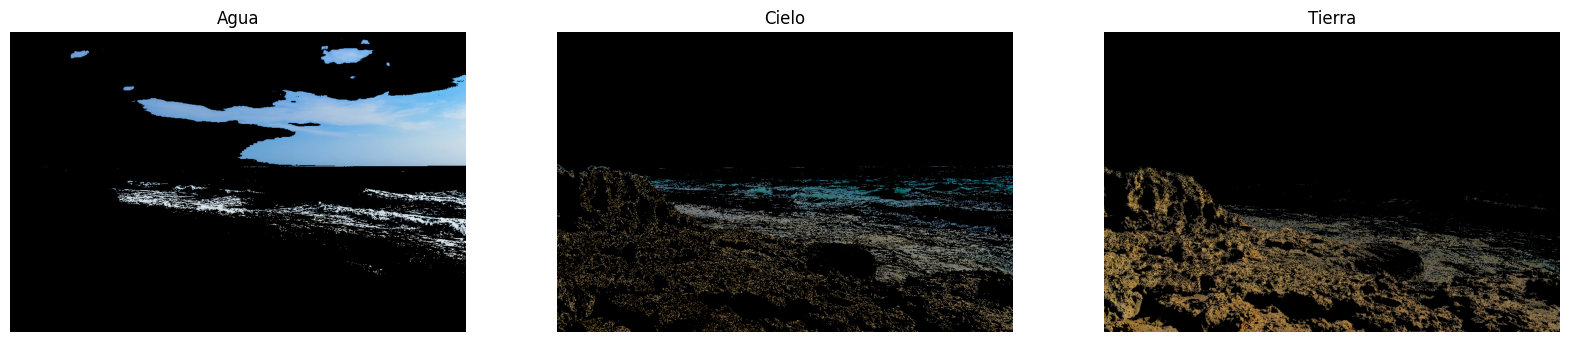

In [ ]:
# Segmentar (agua, cielo y tierra)
# Definir los límites para cada región (en valores RGB)
lower_blue = np.array([100, 150, 200])
upper_blue = np.array([255, 255, 255])
lower_green = np.array([0, 100, 0])
upper_green = np.array([150, 255, 150])
lower_brown = np.array([50, 50, 0])
upper_brown = np.array([200, 200, 100])

# Mascaras
mask_blue = cv.inRange(imagen_rgb, lower_blue, upper_blue)
mask_green = cv.inRange(imagen_rgb, lower_green, upper_green)
mask_brown = cv.inRange(imagen_rgb, lower_brown, upper_brown)
blue_pixels = cv.bitwise_and(imagen_rgb, imagen_rgb, mask=mask_blue)
green_pixels = cv.bitwise_and(imagen_rgb, imagen_rgb, mask=mask_green)
brown_pixels = cv.bitwise_and(imagen_rgb, imagen_rgb, mask=mask_brown)

# Imagenes segmentadas
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.imshow(blue_pixels)
plt.title('Agua')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(green_pixels)
plt.title('Cielo')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(brown_pixels)
plt.title('Tierra')
plt.axis('off')
plt.show()

Vemos que tiene problemas para segmentar la porción de cielo, cuando segmenta el agua se queda con mas cielo y viceversa cuando segmenta el cielo. La tierra la segmenta bastante bien.